In [2]:
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
path = '/Users/yudiwang/Documents/GitProject/Best-Sellers-in-Book/new_all_category.csv'
data = pd.read_csv(path)
times_y = []
times_m = []
yr_2018 = []
for t in range(len(data['publish date'])):
    times_y.append(data['publish date'][t].split()[0].split('/')[-1])
    if times_y[t] == '2018':
        yr_2018.append('2018')
    else:
        yr_2018.append('Other')
    times_m.append(data['publish date'][t].split()[0].split('/')[-2])
data['publish year'] = times_y
data['publish month'] = times_m
data['2018'] = yr_2018
data.head(2)

,name,author,price,original price,pages,publisher,publish type,publish date,available numbers,detail_url,Category,publish year,publish month,2018
0,['The Whole Smiths Good Food Cookbook: Whole30...,"\r\nSmith,Michelle",48.36,56.97,288,['HOUGHTON MIFFLIN '],Hardcover,05/06/2018,21,https://opentrolley.com.sg/Book_Detail.aspx?EA...,Cooking,2018,06,2018
1,"[""Delish: Eat Like Every Day's the Weekend""]",\r\nEditorsofDelish,50.88,59.93,416,['HOUGHTON MIFFLIN '],Hardcover,16/10/2018,42,https://opentrolley.com.sg/Book_Detail.aspx?EA...,Cooking,2018,10,2018


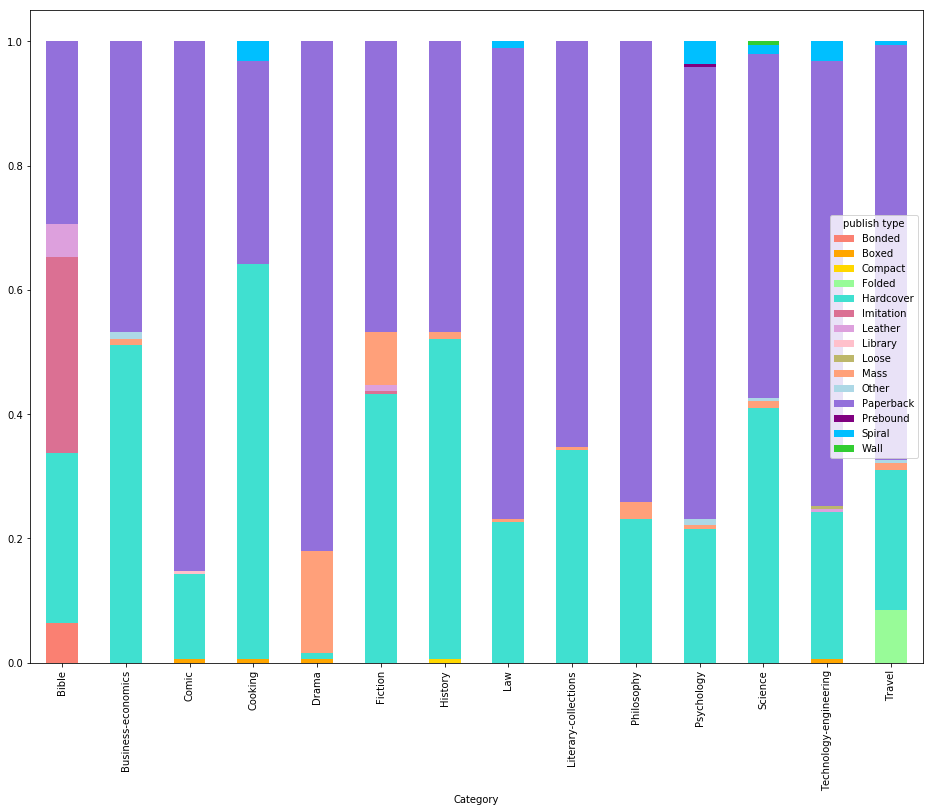

In [10]:
color_set = ['salmon','orange','gold','palegreen','turquoise',
             'palevioletred','plum','pink','darkkhaki','lightsalmon','lightblue',
             'mediumpurple','purple','deepskyblue','limegreen','firebrick']
df2 = data.groupby(['Category','publish type']).size().unstack('publish type').fillna(0)
df2.div(df2.sum(axis=1),axis=0).plot(kind='bar',
             stacked =True,
             figsize = (16,12),
             color = color_set
            )

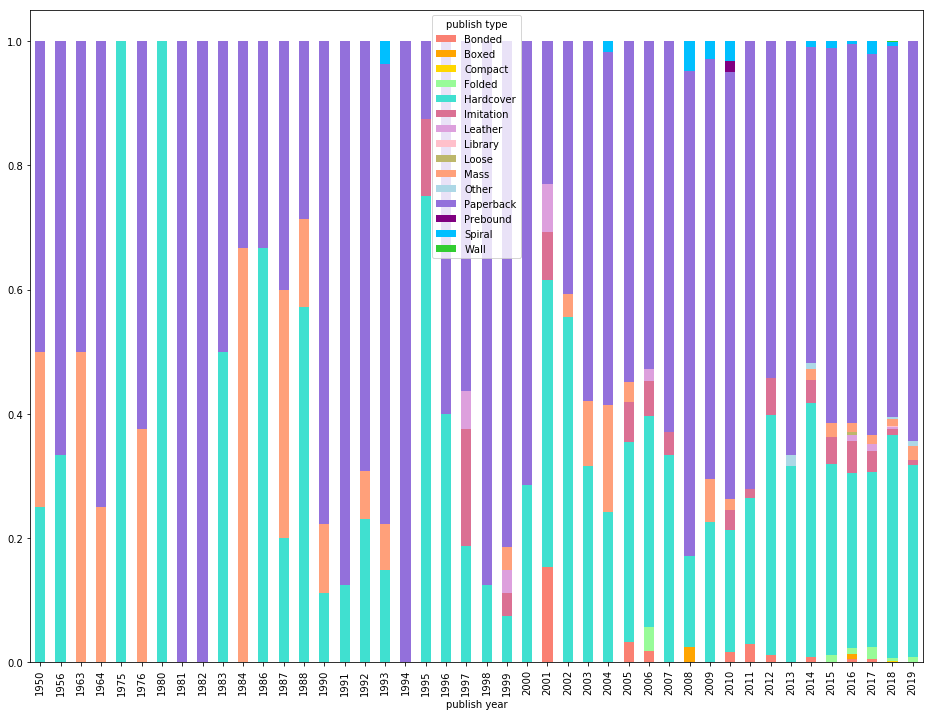

In [8]:
color_set = ['salmon','orange','gold','palegreen','turquoise',
             'palevioletred','plum','pink','darkkhaki','lightsalmon','lightblue',
             'mediumpurple','purple','deepskyblue','limegreen','firebrick']
df2 = data.groupby(['publish year','publish type']).size().unstack('publish type').fillna(0)
df2.div(df2.sum(axis=1),axis=0).plot(kind='bar',
             stacked =True,
             figsize = (16,12),
             color = color_set
            )


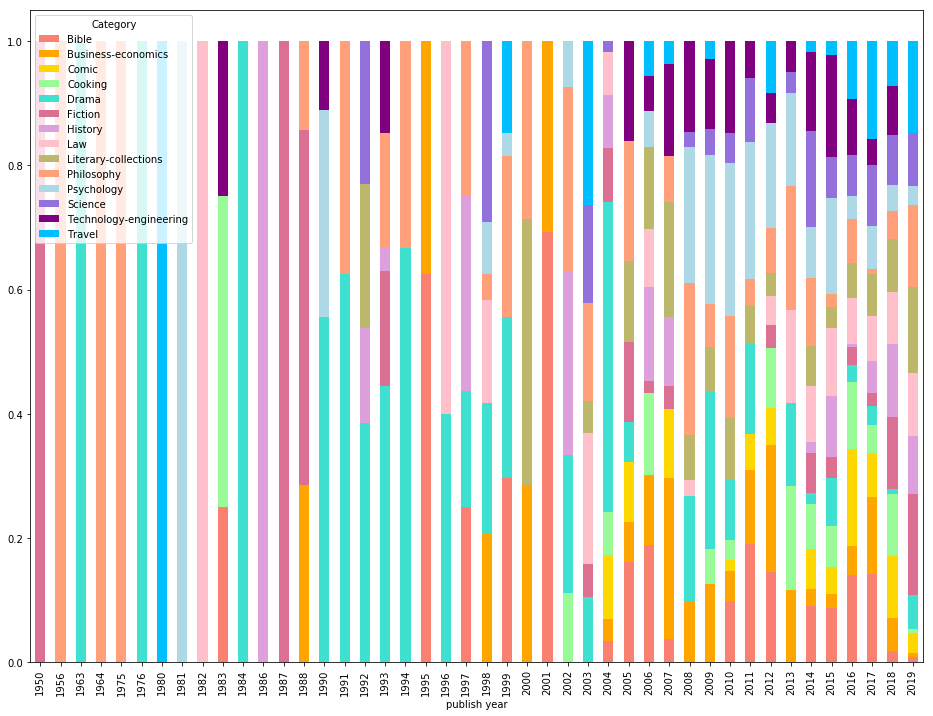

In [9]:

color_set = ['salmon','orange','gold','palegreen','turquoise',
             'palevioletred','plum','pink','darkkhaki','lightsalmon','lightblue',
             'mediumpurple','purple','deepskyblue','limegreen','firebrick']
df2 = data.groupby(['publish year','Category']).size().unstack('Category').fillna(0)
b = df2.div(df2.sum(axis=1),axis=0).plot(kind='bar',
             stacked =True,
             figsize = (16,12),
             color = color_set
            )


In [ ]:
# year = data['publish year'].sort_values().unique()
# category = list(range(1))

# df_category = pd.DataFrame(data, index=year, columns=category_tmp)
# print(type(year))
# df_category
# category.head()
# from matplotlib.pylab import subplots
# # 'rosybrown','salmon','peachpuff','coral',lightblue

# import random
# random.shuffle(color_set)
# ax = df_category.plot.bar(stacked=True,figsize = (8,6),color = color_set, width = 0.9)
# sz =data.groupby('publish year').size()
# print(sz)
# category_tmp = data.groupby(['publish year','Category']).size().reset_index().groupby('publish year')
# print(category_tmp[0].values)
# data[['publish year','Category']].plot(kind='bar', stacked=True)

Category
Bible                     52.878263
Business-economics        37.230632
Comic                     29.409684
Cooking                   45.227789
Drama                     19.344895
Fiction                   29.842526
History                   40.634526
Law                       70.179263
Literary-collections      28.304000
Philosophy                32.331000
Psychology                39.794632
Science                   39.679579
Technology-engineering    73.721368
Travel                    34.455737
Name: price, dtype: float64


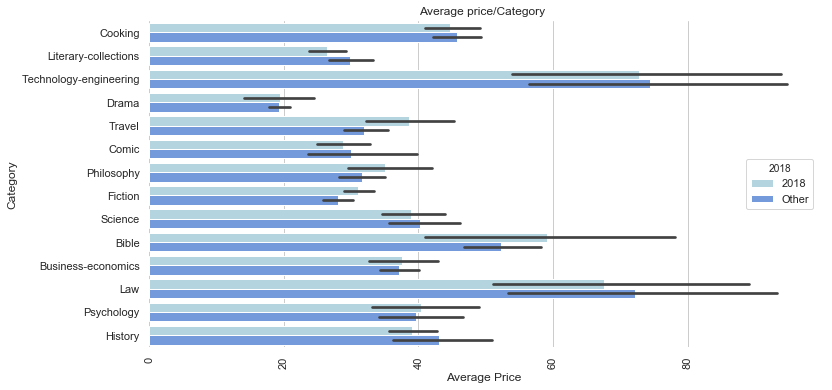

In [87]:
t1 = data.groupby('Category')
c_means = t1['price'].mean()
print(c_means)
pyplot.figure(
    figsize=(12,6)
)
sns.set(style='whitegrid')
ax = sns.barplot(y='Category',
                 x='price', 
                 hue='2018',
                 palette=['lightblue','cornflowerblue'],
                 data=data)
ax.set_title('Average price/Category ')
ax.set_xlabel('Average Price')
sns.despine(bottom=True, left=True)
pyplot.xticks(rotation=90)
plt.show()

pandas.core.series.Series

In [31]:

# year = list(range(2008,2019))
# category = ['']
df_category = pd.DataFrame(data, index = year, columns= category)
# from matplotlib.pylab import subplots
# color_set = ['salmon','orange','gold','palegreen','turquoise',
#              'palevioletred','plum','pink','darkkhaki','lightsalmon','lightblue',
#              'mediumpurple','purple','deepskyblue','limegreen','firebrick']
# # 'rosybrown','salmon','peachpuff','coral',lightblue

# import random
# random.shuffle(color_set)
# ax = df_category.plot.bar(stacked=True,figsize = (8,6),color = color_set, width = 0.9);

NameError: name 'category' is not defined

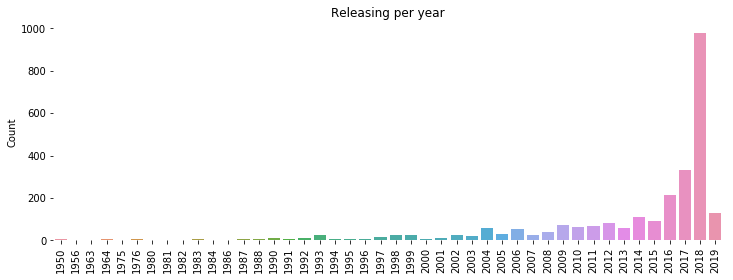

In [35]:
import seaborn as sns
from matplotlib import pyplot
pyplot.figure(
    figsize=(12,4)
)
ax = sns.countplot(freq_yr)

pyplot.xticks(rotation=90)
ax.set_ylabel('Count')
ax.set_title('Releasing per year')
sns.despine(bottom=True, left=True)
pyplot.show()
# ax.set_xticklabels(rotation ='vertical')

In [17]:
import calendar
times = data['publish date'][:]
freq_yr = []
freq_mth = []
yr_dict = {}
for ele in times:
    tmp_yr = ele.split()[0].split('/')[-1]
    tmp_mth = ele.split()[0].split('/')[-2]
    freq_yr.append(tmp_yr)
    freq_mth.append(tmp_mth)

unique_yr = set(freq_yr)
item_yr = []
cnt_yr = []
for ele in unique_yr:
    item_yr.append(ele)
    cnt_yr.append(freq_yr.count(ele))
    
count_dict_yr = {}
count_dict_yr = {'Year':item_yr, 'Count':cnt_yr}
result_yr = pd.DataFrame(count_dict_yr)

unique_mth = set(freq_mth)
item_mth = []
cnt_mth = []
for ele in unique_mth:
#     tmp = int(ele)
#     ele_abbr = calendar.month_abbr[tmp]
#     item_mth.append(ele_abbr)
    item_mth.append(ele)
    cnt_mth.append(freq_mth.count(ele))
    
count_dict_mth = {}
count_dict_mth = {'Month':item_mth, 'Count':cnt_mth}
result_mth = pd.DataFrame(count_dict_mth)

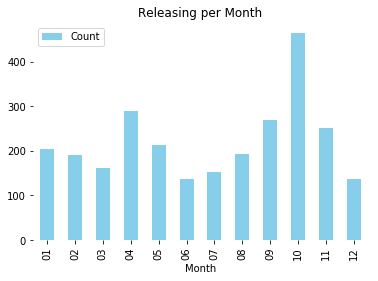

In [18]:
result_mth.set_index('Month').sort_index().plot(
    kind='bar',
    title='Releasing per Month', 
    color = []'SkyBlue'
)
sns.despine(bottom=True, left=True)
pyplot.show()

In [ ]:
sns.jointplot(x='price', y='points', 
              data=reviews[reviews['price'] < 100], kind='hex', 
              gridsize=20)

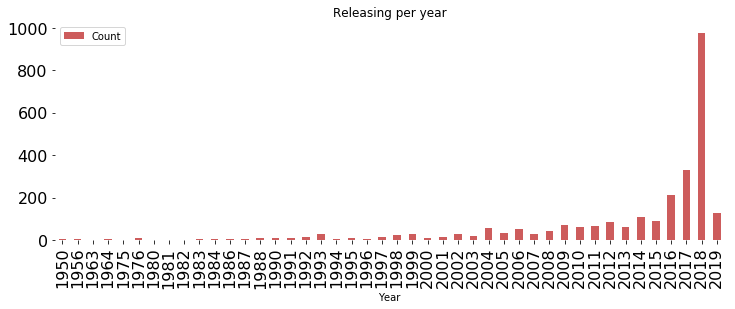

In [8]:
# Years of maximum release of Books
# Plot the result_yr
from matplotlib import pyplot
result_yr.set_index('Year').sort_index().plot(
    kind='bar',
    title='Releasing per year',
    color = 'IndianRed', 
    figsize=(12,4),
    fontsize = 16
)
sns.despine(bottom=True, left=True)
pyplot.show()

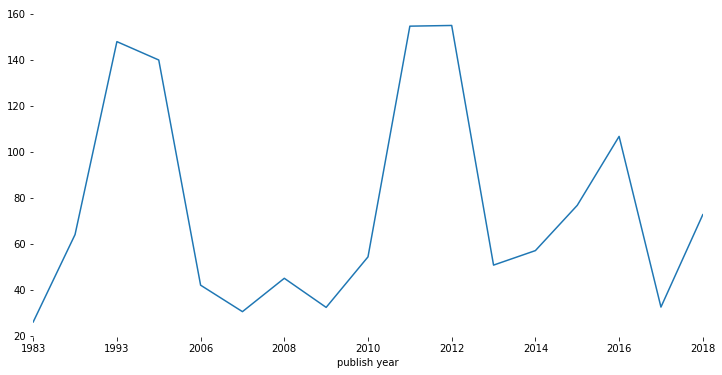

In [6]:
tech_eng= data[data['Category']=='Technology-engineering']
tech1 = tech_eng.groupby('publish year')

plt.figure(
    figsize=(12,6)
)
c_means = tech1['price'].mean().sort_index().plot()
sns.despine(bottom=True, left=True)
# plt.xticks(rotation=90)
plt.show()